In [ ]:
pip install tensorflow-text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hb
import tensorflow_text as text

In [ ]:
import pandas as pd 
import zipfile

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
z= zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/YouTube-Spam-Collection-v1.zip")
Psy=pd.read_csv(z.open("Youtube01-Psy.csv"))
KatyPerry  =pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAQ =pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem =pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira =pd.read_csv(z.open("Youtube05-Shakira.csv"))

Mounted at /content/drive


In [ ]:
frames = [Psy,LMFAQ,Eminem,Shakira,KatyPerry]
df = pd.concat(frames)
df.drop(["COMMENT_ID","DATE","AUTHOR"],axis=1,inplace=True)
df.head(10)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,"Hey, check out my new website!! This site is a...",1
6,Subscribe to my channel ﻿,1
7,i turned it on mute as soon is i came on i jus...,0
8,You should check my channel for Funny VIDEOS!!﻿,1
9,and u should.d check my channel and tell me wh...,1


In [ ]:
df.groupby('CONTENT').describe()

CLASS       ...          
                                                   count mean  ...  75%  max
CONTENT                                                        ...          
  Check out my SEXY VIDEO :*                         2.0  1.0  ...  1.0  1.0
  Eminem is the king of rap  Micheal Jackson is...   1.0  1.0  ...  1.0  1.0
  HI!:D!:) We’ re TWIN MELODY ,17 year old twin...   1.0  1.0  ...  1.0  1.0
  Haha , Miley Cyrus has done it once again  To...   1.0  1.0  ...  1.0  1.0
  Perhaps you have seen the newest Miley Cyrus ...   1.0  1.0  ...  1.0  1.0
...                                                  ...  ...  ...  ...  ...
❤️❤️❤️﻿                                              1.0  0.0  ...  0.0  0.0
ｈｔｔｐ://ｗｗｗ.ｅｂａｙ.ｃｏｍ/ｕｓｒ/ｓｈｏｅｃｏｌｌｅｃｔｏｒ314             1.0  1.0  ...  1.0  1.0
😫😓😏😪😔😖😌😭😎😚😘😙😗😋😝😜😛😍😒😞😷😶😵😳😲😱😟😰😩😨😧😦😥😤😣😮😴😢😡😠😬😕😑😐😯😉😈...   1.0  0.0  ...  0.0  0.0
😼👍😏 Like This Comment 😏👍😼﻿                           1.0  1.0  ...  1.0  1.0
🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨<br />NOW THAT I HAVE YOUR ATTE...   1.0  1.0  ...  1.0  1.0

[1760 rows x 8 columns]

In [ ]:
df.groupby('CLASS').describe()

CONTENT                                               
        count unique                                top freq
CLASS                                                       
0         951    919                                wow    4
1        1005    841  Check out this video on YouTube:﻿   97

In [ ]:
df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [ ]:
 951/1005

0.9462686567164179

In [ ]:
 df_spam=df[df['CLASS']==1]
 df_spam.shape

(1005, 2)

In [ ]:
df_ham = df[df['CLASS']==0]
df_ham.shape

(951, 2)

In [ ]:
df_ham.sample(951)

,CONTENT,CLASS
199,Every time I watch this mv I just so so so gla...,0
152,"Hey, it&#39;s Charlie from Lost﻿",0
342,Why does a song like this have more views than...,0
264,we all love you Katy Perry &lt;3﻿,0
139,Loves it﻿,0
...,...,...
133,like me﻿,0
285,Shakira,0
7,This song is just really fun ﻿,0
173,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0


ham and spam are balanced

In [ ]:
df_spam_d=df_spam.sample( df_ham.shape[0])
df_spam_d.shape

(951, 2)

In [ ]:
df_balanced = pd.concat([df_ham, df_spam_d])
df_balanced.shape

(1902, 2)

In [ ]:
df_balanced['CLASS'].value_counts()

0    951
1    951
Name: CLASS, dtype: int64

In [ ]:
   df_balanced[1]=df_balanced['CLASS'].apply(lambda x: 1 if x==1 else 0)
   df_balanced.sample(5)


,CONTENT,CLASS,1
316,Check out this playlist on YouTube:﻿,1,1
48,plese subscribe to me﻿,1,1
317,Check out this video on YouTube:﻿,1,1
341,Free my apps get 1m crdits ! Just click on the...,1,1
0,+447935454150 lovely girl talk to me xxx﻿,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['CONTENT'],df_balanced[1], stratify=df_balanced[1])

In [ ]:
X_train.head(4)

426               I learned the shuffle because of them﻿
117    Why do I feel like as if Gangnam style copied ...
178    Please check out my New Song (MUSIC VIDEO) AD ...
79     &lt;3 this song so much.SHAKIRA YOUR A REALLY ...
Name: CONTENT, dtype: object

In [ ]:
import tensorflow_hub as hub

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']



In [ ]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [ ]:
 from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[3]],[e[4]])

array([[0.9872036]], dtype=float32)

In [ ]:
 # Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [ ]:
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
len(X_train)

1426

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
45/45 [==============================] - 42s 673ms/step - loss: 0.6758 - accuracy: 0.5870 - precision: 0.5912 - recall: 0.5638
Epoch 2/100
45/45 [==============================] - 30s 675ms/step - loss: 0.6168 - accuracy: 0.6585 - precision: 0.6507 - recall: 0.6844
Epoch 3/100
45/45 [==============================] - 31s 676ms/step - loss: 0.5827 - accuracy: 0.6942 - precision: 0.6859 - recall: 0.7167
Epoch 4/100
45/45 [==============================] - 31s 681ms/step - loss: 0.5541 - accuracy: 0.7223 - precision: 0.7242 - recall: 0.7181
Epoch 5/100
45/45 [==============================] - 31s 685ms/step - loss: 0.5385 - accuracy: 0.7384 - precision: 0.7450 - recall: 0.7251
Epoch 6/100
45/45 [==============================] - 31s 689ms/step - loss: 0.5046 - accuracy: 0.7735 - precision: 0.7731 - recall: 0.7742
Epoch 7/100
45/45 [==============================] - 31s 687ms/step - loss: 0.5011 - accuracy: 0.7742 - precision: 0.7837 - recall: 0.7574
Epoch 8/100
45/45 [========

In [ ]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 11s 678ms/step - loss: 0.2640 - accuracy: 0.8992 - precision: 0.8831 - recall: 0.9202


[0.2639540731906891,
 0.8991596698760986,
 0.8830645084381104,
 0.9201680421829224]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[209,  29],
       [ 19, 219]])

Text(33.0, 0.5, 'Truth')

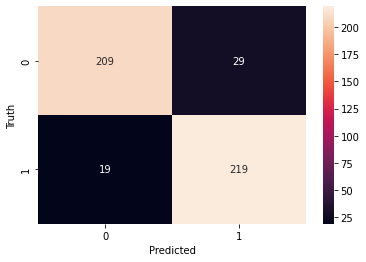

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       238
           1       0.88      0.92      0.90       238

    accuracy                           0.90       476
   macro avg       0.90      0.90      0.90       476
weighted avg       0.90      0.90      0.90       476

